<a href="https://colab.research.google.com/github/vivekbabu9640/DataScienceProjects/blob/main/AI_%26_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import HTML

In [ ]:
df = pd.read_csv('/content/healthcare_dataset.csv')

### Preview of data

In [ ]:
df.head(5)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


### Column Names Standardization

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [ ]:
df['name'] = df['name'].str.strip().str.title()

### Preview after column standardization

In [ ]:
df.head(5)

,name,age,gender,blood_type,medical_condition,date_of_admission,doctor,hospital,insurance_provider,billing_amount,room_number,admission_type,discharge_date,medication,test_results
0,Bobby Jackson,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,Leslie Terry,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,Danny Smith,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,Andrew Watts,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,Adrienne Bell,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


1.Do patients with certain medical condition tend to have higher billing amount?

  A: This explains us to expect the billing amount accordingly or specific to medical condition

In [ ]:
   med_condition_billing =   df.groupby('medical_condition')['billing_amount'].mean().sort_values(ascending=False)
   print("average billing by medical conditions:\n")
   print(med_condition_billing)

average billing by medical conditions:

medical_condition
Obesity         25805.971259
Diabetes        25638.405577
Asthma          25635.249359
Arthritis       25497.327056
Hypertension    25497.095761
Cancer          25161.792707
Name: billing_amount, dtype: float64


2.Do patients covered by specific insurance providers have different average billing amounts?

A: Average billing amount specifically for all insurance providers can be found and analysed.

In [ ]:
df.groupby('insurance_provider')['billing_amount'].mean().sort_values(ascending=False)

,billing_amount
insurance_provider,
Medicare,25615.990508
Blue Cross,25613.011503
Aetna,25553.294506
Cigna,25525.766314
UnitedHealthcare,25389.172390


3.Are younger patients (under 40) more likely to be admitted for urgent conditions compared to older patients?

A: It explains the extent of young patients who are admitted for 'Urgent' conditions.

In [ ]:

under_40 = df[df['age'] < 40]
over_40 = df[df['age'] > 40]


urgent_young = under_40[under_40['admission_type'] == 'Urgent']
urgent_old = over_40[over_40['admission_type'] == 'Urgent']

print(f"Number of Young patients in Urgent Conditions: {urgent_young.shape[0]}")
print(f"Number of Old patients in Urgent Conditions: {urgent_old.shape[0]}")




Number of Young patients in Urgent Conditions: 5949
Number of Old patients in Urgent Conditions: 12381


4.Is there a pattern between admission type (Emergency, Urgent, Elective) and the length of stay ?

A: It basically explains the correlation between "admission type" and "length of stay"

In [ ]:


df['length_of_stay'] =pd.to_datetime( df['discharge_date']) - pd.to_datetime( df['date_of_admission'])

print(df.groupby('admission_type')['length_of_stay'].mean().dt.days)


admission_type
Elective     15
Emergency    15
Urgent       15
Name: length_of_stay, dtype: int64


5.Which insurance provider covers large number of patients?

A: It results in finding the insurance provider with large number of patients it covered

In [ ]:

coverage_count = (df['insurance_provider'].value_counts())
print(coverage_count)



insurance_provider
Cigna               11249
Medicare            11154
UnitedHealthcare    11125
Blue Cross          11059
Aetna               10913
Name: count, dtype: int64


6.Which gender shows a higher proportion of urgent admissions?

A: It shows gender specific proportion in 'Urgent' admission type

In [ ]:
male_urgent = df[(df['admission_type'] == 'Urgent') & (df['gender'] == 'Male')]
female_urgent = df[(df['admission_type'] == 'Urgent') & (df['gender'] == 'Female')]

print(f"Number of urgent admissions for Male patients: {male_urgent.shape[0]}")
print(f"Number of urgent admissions for Female patients: {female_urgent.shape[0]}")


Number of urgent admissions for Male patients: 9468
Number of urgent admissions for Female patients: 9108


7.Is there any correlation between age and billing amount ?

A: It explains correlation between age and billing amount

In [ ]:
correlated = df[['age', 'billing_amount']].corr()
print("Correlation between age and billing amount:")
print(correlated)

Correlation between age and billing amount:
                     age  billing_amount
age             1.000000       -0.003832
billing_amount -0.003832        1.000000


8. Gender Ratio

In [ ]:
print(df['gender'].unique())
print(df['gender'].value_counts())

['Male' 'Female']
gender
Male      27774
Female    27726
Name: count, dtype: int64


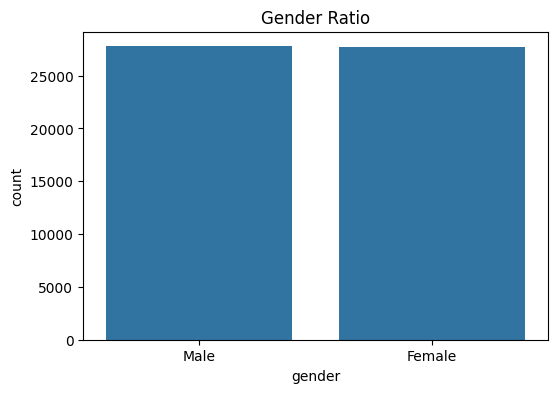

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender',data=df)
plt.title("Gender Ratio")
plt.show()

9. Relation between Medication and Costs ?

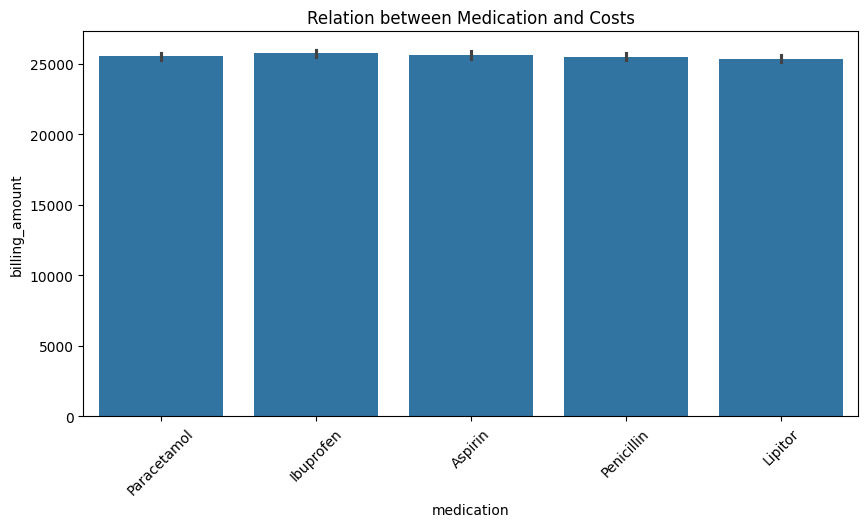

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='medication', y ='billing_amount',data=df)
plt.title("Relation between Medication and Costs")
plt.xticks(rotation=45)
plt.show()

10. What is relation between medical condition and length of stay?

In [ ]:
med_condition_staylength =df.groupby('medical_condition')['length_of_stay'].mean().dt.days
print("average length of stay by condition:")
print(med_condition_staylength)

average length of stay by condition:
medical_condition
Arthritis       15
Asthma          15
Cancer          15
Diabetes        15
Hypertension    15
Obesity         15
Name: length_of_stay, dtype: int64


### About Dataset

This dataset was built as a learning resource for anyone interested in data science, machine learning, or analytics. It’s designed to resemble real healthcare records so that learners can practice working with data in a healthcare context—without the privacy concerns that come with actual patient information. It is a synthetic health care dataset used for educational purposes.



### Insights



1.   The gender ratio among the patients is almost equal wit very minor
difference.
2.   In Overall conditiions "Asthma" patients tend to spend more money on healthcare.
3. The highest average billing amount for insurance providers is for "Aetna"
4. Mostly Old-age patients were joined under "Urgent" conditions.
5. The insurance provider "Cigna" covers the large number of patients.
6. Average length of stay is same for all health conditions.
7. Medical costs for all types of medications is almost equal.
8. Medical Billing amounts are almost equal for all type of health conditions.







### **Google Drive Video Link**

[https://drive.google.com/file/d/1bQGfYGPiSf4w4wfyVzBqBGGjNOWSJBdf/view?usp=drive_link]

### **GitHub Link**

https://github.com/vivekbabu9640/DataScienceProjects/blob/main/AI_%26_Applications.ipynb



dataset link



HTML('<a href="https://www.kaggle.com/datasets/prasad22/healthcare-dataset" target="_blank">Click here</a>')



